# Life Cycle Assessment - TSAS scenarios

> **⚠ This notebook has been developed with the AeroMAPS version v0.7.1-beta for obtaining the paper results. However, this notebook has been or could be modified in order to be executable with the latest versions of AeroMAPS, which sometimes leads to different results compared to the ones from the paper, due to some models' modifications. In order to retrieve the results of the paper, one can use the v0.7.1-beta version associated with the original notebook.**

The LCA module performs an environmental assessment of the scenarios using data from both AeroMAPS (e.g., fuel combustion emission factors) and the ecoinvent database (for background processes such as electricity generation). In this case study, the environmental profiles of the various fuel production pathways (biofuels and electrofuels) are entirely based on *ecoinvent* data (completed by *premise*) rather than AeroMAPS models. In particular, the some environmental characteristics of the fuel pathways provided in the `energy_inputs.yaml` files are overrode by ecoinvent data in the LCA module (for example the mean CO2 emission factor). While this approach ensures broader coverage of environmental processes, it may also lead to results that are not fully consistent with those generated by AeroMAPS’ core impact models.

## Load modules

First, the user has to load the framework and generate a process.

In [1]:
# --- Import libraries ---
%matplotlib widget
import pandas as pd
import brightway2 as bw
import lca_algebraic as agb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import math
import collections
import time
plt.style.use('bmh')

# --- Aeromaps models and processes ---
from aeromaps import create_process
from aeromaps.core.models import (
    models_traffic,
    models_efficiency_top_down_interp,
    models_energy_with_fuel_effect,
    models_offset,
    models_climate_fair,
    models_energy_cost,
    models_operation_cost_top_down,
    models_abatements_cost_simplified,
)
from aeromaps.models.impacts.life_cycle_assessment.life_cycle_assessment import LifeCycleAssessment

In [2]:
# --- Set AeroMAPS models for this simulation ---
# Note: first call to LCA module takes a dozen minutes depending on CPU, as it will install ecoinvent/premise databases (unless previsouly installed)
# and parametrize the LCA model declared in LCA configuration file (each time the kernel is restarted).
models = {
    "models_traffic": models_traffic,
    "models_efficiency_top_down_interp": models_efficiency_top_down_interp,
    "models_energy_with_fuel_effect": models_energy_with_fuel_effect,
    "models_offset": models_offset,
    "models_climate_fair": models_climate_fair,
    "models_energy_cost": models_energy_cost,
    "models_operation_cost_top_down": models_operation_cost_top_down,
    "models_abatements_cost_simplified": models_abatements_cost_simplified,
    "life_cycle_assessment": LifeCycleAssessment(
        configuration_file="./data/lca_data/configuration_file_lca_tsas.yaml",
        split_by="phase"
    )
}

Initial setup of EcoInvent already done, skipping. To reset the project use option `reset_project=True` in configuration file.
Creating custom LCIA method  ('Custom methods', 'climate change (with non-CO2)', 'global warming potential (GWP100)')


Writing activities to SQLite3 database:
0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 10/21/2025 11:33:08
  Finished: 10/21/2025 11:33:08
  Total time elapsed: 00:00:00
  CPU %: 2.50
  Memory %: 2.39
Added 1 new biosphere flows
1 methods
130 cfs
0 unlinked cfs
Wrote 1 LCIA methods with 130 characterization factors
Wrote matching file to:
/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/notebooks/publications/tsas_2025/data/lca_data/lcia_nonCO2_global_warming_updated.xlsx
Creating custom LCIA method  ('Custom methods', 'total: ecosystem quality (with non-CO2)', 'ecosystem quality')
1 methods
1990 cfs
0 unlinked cfs
Wrote 1 LCIA methods with 1990 characterization factors
Wrote matching file to:
/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/notebooks/publications/tsas_2025/data/lca_data/lcia_nonCO2_ecosystem_quality_updated.xlsx
Creating custom LCIA method  ('Custom methods', 'total: human health (with non-CO2)', 'human health')
1 methods
1618 cfs
0 unlinked cfs
Wrote 1 LCIA methods with 1618 characterizati

In [3]:
# For check only: check which LCA databases were installed
list(bw.databases)

['biosphere3',
 'ecoinvent-3.10-cutoff',
 'ecoinvent_cutoff_3.10_remind_SSP2-Base_2020',
 'ecoinvent_cutoff_3.10_remind_SSP2-Base_2030',
 'ecoinvent_cutoff_3.10_remind_SSP2-Base_2040',
 'ecoinvent_cutoff_3.10_remind_SSP2-Base_2050',
 'ecoinvent_cutoff_3.10_remind_SSP2-Base_2060',
 'ecoinvent_cutoff_3.10_remind_SSP2-Base_2070',
 'ecoinvent_cutoff_3.10_remind_SSP2-PkBudg1150_2020',
 'ecoinvent_cutoff_3.10_remind_SSP2-PkBudg1150_2030',
 'ecoinvent_cutoff_3.10_remind_SSP2-PkBudg1150_2040',
 'ecoinvent_cutoff_3.10_remind_SSP2-PkBudg1150_2050',
 'ecoinvent_cutoff_3.10_remind_SSP2-PkBudg1150_2060',
 'ecoinvent_cutoff_3.10_remind_SSP2-PkBudg1150_2070',
 'biosphere_user',
 'Foreground DB']

## Scenario 1

### a) Set parameters

In [3]:
# --- Create process for scenario IS0 medium ---
process = create_process(
    configuration_file="data/config_files/config_is0medium.json",
    models=models,
)

⚠️ Warning: reference pathway for CAC (fossil_kerosene is not defined as bottom-up, using top-down values for CAC computation.


### b) Compute

In [4]:
# --- Run assessment ---
start_time = time.time()
process.compute()
process.write_json()
print("--- %s seconds ---" % (time.time() - start_time))

/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:90: UserWarning: 
[Interpolation Model: fossil_kerosene_mean_co2_emission_factor_without_resource Warning]
The first reference year (2000) differs from the prospection start year (2020).
Interpolation will begin at the first reference year.
  warnings.warn(


Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:121: UserWarning: 
[Interpolation Model: grid_electricity_co2_emission_factor Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:121: UserWarning: 
[Interpolation Model: liquefaction_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:121: UserWarning: 
[Interpolation Model: electrolysis_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as

--- 6.208705902099609 seconds ---


### c) Results and plots

In [6]:
# --- Plot results ---
process_data_vector_outputs_scenario_1 = process.data['vector_outputs']
process_data_float_inputs_scenario_1 = process.data['float_inputs']
process_data_climate_scenario_1 = process.data["climate_outputs"]
lca_outputs_scenario_1 = process.data['lca_outputs']
lca_outputs_scenario_1

<xarray.DataArray 'lca' (systems: 1, impacts: 24, axis: 15, year: 71)> Size: 204kB
array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [3.38845324e+07, 3.36472950e+07, 3.34100576e+07, ...,
          2.29493189e+07, 2.28926453e+07, 2.28359716e+07],
         [3.30538240e+08, 3.22260968e+08, 3.24204148e+08, ...,
          1.97076552e+09, 2.02848598e+09, 2.08789589e+09],
         [5.24548712e-02, 5.15147571e-02, 5.05746430e-02, ...,
          6.82215553e-03, 6.80119685e-03, 6.78023817e-03]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
         [2.46837961e+01, 2.45097449e+01, 2.43356938e+01, ...,
          1.59304300e+01, 1.58696333e+01, 1.58088365e+01],
         [3.26994188e+02, 3.19066468e+02, 3.21254338e+02, ...,
          1.98309342e+03, 2.04041168e+03, 2.09938416e+03],
         [4.29612869e-08, 4.22054383e-08, 4.14495896e-08, ...,
          1.36816030e-09, 1.34683525e-09, 1.32551019e-09]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [3.70124786e+05, 3.61936185e+05, 3.65211625e+05, ...,
          2.51631933e+06, 2.59180612e+06, 2.66955731e+06],
         ...,
         [8.17641851e+03, 8.11874595e+03, 8.06107339e+03, ...,
          5.27597980e+03, 5.25583587e+03, 5.23569193e+03],
         [1.08273768e+05, 1.05648593e+05, 1.06372872e+05, ...,
          6.56585267e+05, 6.75562364e+05, 6.95087130e+05],
         [1.42370843e-05, 1.39866018e-05, 1.37361193e-05, ...,
          4.53384980e-07, 4.46319460e-07, 4.39253941e-07]]]])
Coordinates:
  * systems  (systems) object 8B ('Foreground DB', 'model')
  * impacts  (impacts) object 192B ('ReCiPe 2016 v1.03, midpoint (H)', 'acidi...
  * axis     (axis) object 120B 'CO2_biofuel' ... 'e_fuel_production'
  * year     (year) float64 568B 2e+03 2.001e+03 ... 2.069e+03 2.07e+03

In [7]:
def plot_stacked_evolution_subplots(xarray_data):
    """
    Plots a stacked evolution of the LCA results provided as an xarray
    """
    
    df = xarray_data.to_dataframe().reset_index()
    
    # Set the desired columns as a MultiIndex
    df = df.set_index(['impacts', 'axis', 'year'])
    
    # Pivot the DataFrame to have years as columns
    df = df.pivot_table(values='lca', index=['impacts', 'axis'], columns='year')
    
    # Remove phases containing 'sum'
    df_filtered = df[~df.index.get_level_values('axis').str.contains('sum')]
    df_filtered = df_filtered[~df_filtered.index.get_level_values('axis').str.contains('_other_')]  # make sure it is equal to zero before deleting
    
    methods = df_filtered.index.get_level_values('impacts').unique()#[:9]
    years = df_filtered.columns
    
    # Determine the number of rows and columns for the subplots
    n_methods = len(methods)
    n_cols = 3 #2 if n_methods % 2 == 0 else 3
    n_rows = math.ceil(n_methods / n_cols)
    
    # Use seaborn color palette for better aesthetics
    palette = sns.color_palette("Set2", len(df_filtered.index.levels[1]))
    #palette = sns.color_palette("Paired", len(df_filtered.index.levels[1]))
    palette_dict = {
        'aircraft_production': (palette[3], ''),
        'airport': (palette[1], ''),
        'kerosene_production': (palette[2], ''),
        'biofuel_production': (palette[5], ''),
        'e_fuel_production': (palette[8], ''),
        'hydrogen_production': (palette[6], ''),
        'CO2 from combustion': (palette[7], ''),
        "Non-CO2 from combustion": ('0.8', '//'),
        #'Production Electrofuel\n(Electrolysis)': ('0.8', '\\'),
        #'production_kerosene': (palette[8], ''),
    }
    
    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4), constrained_layout=False)
    axes = axes.flatten()  # Flatten the array of axes for easy iteration

    for i, method in enumerate(methods):
        df_method = df_filtered.xs(method, level='impacts')
        df_method.index = df_method.index.str.replace('_other_', 'Others')

        # Group CO2 emissions together
        co2_rows = df_method.index.str.startswith('CO2')
        co2_aggregated = df_method[co2_rows].sum()
        co2_aggregated.name = "CO2 from combustion"
        df_method = pd.concat([df_method[~co2_rows], co2_aggregated.to_frame().T], ignore_index=False) 

        # Group non-CO2 emissions together
        nonco2_rows = df_method.index.str.startswith('non_CO2')
        nonco2_aggregated = df_method[nonco2_rows].sum()
        nonco2_aggregated.name = "Non-CO2 from combustion"
        df_method = pd.concat([df_method[~nonco2_rows], nonco2_aggregated.to_frame().T], ignore_index=False) 
        
        # Remove elements with no contribution to score
        df_method = df_method.loc[~(df_method.eq(0).all(axis=1))]
        
        # Plot stacked area chart with custom colors
        #stacks = axes[i].stackplot(years, df_method, labels=df_method.index, alpha=0.8, colors=palette)
        colors = [palette_dict[key][0] for key in df_method.index]
        stacks = axes[i].stackplot(years, df_method, labels=df_method.index, alpha=0.8, colors=colors, linewidth=0.2)
        
        # Customize the subplot
        name = method[2]
        #name = name.replace('- ', '\n').replace('(', '\n(')
        name = name.replace('(with non-CO2)', '')
        name = name.replace('total', '')
        name = name.split('- ')[0]
        name = name.replace(':', '\n')
        name = "".join([a if a.isupper() else b for a,b in zip(name,name.title())])
        
        unit = bw.Method(method).metadata.get('unit')
        unit = unit.replace(']', '')
        unit = unit.replace('m2*a crop-Eq', r'm$^2\times$yr annual crop land')
        unit = unit.replace('-Eq', '-eq')
        unit = unit.replace('CO2', r'CO$_2$')
        
        axes[i].set_title(name, fontsize=12)
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel(unit)
        axes[i].grid(True)
        axes[i].set_axisbelow(True)
        axes[i].ticklabel_format(axis='y', scilimits=(0,4))
        axes[i].set_facecolor('white')

        # Set hatches pattern
        hatches = [palette_dict[key][1] for key in df_method.index]
        for stack, hatch, values in zip(stacks, hatches, df_method.values):
            if np.any(values != 0):  # Check if the layer has non-zero values
                stack.set_edgecolor('0.1')
            #stack.set_edgecolor(color)
            if hatch:
                stack.set_hatch(hatch)
    
    # Collect legend labels from all plots.
    all_handles = []
    all_labels = []
    for ax in axes: 
        handles, labels = ax.get_legend_handles_labels()
        all_handles.extend(handles)
        all_labels.extend(labels)
    
    entries = collections.OrderedDict()
    for ax in axes.flatten():
        for handle, label in zip(all_handles, all_labels):
            #if 'biofuel' in label or 'electrofuel' in label:
            #    continue
            if label == 'Others':
                continue
            if "CO2" in label:
                label_name = label.replace('CO2', r'CO$_2$')
            elif "e_fuel" in label:
                label_name = label.replace('e_fuel', 'E-Fuel').replace('_', ' ').title()
            else:
                label_name = label.replace('_', ' ').title()
            entries[label_name] = handle
    legend = fig.legend(
        entries.values(), entries.keys(),
        loc='lower center', bbox_to_anchor=(0.5, 0),
        ncol=4,
        fontsize=11,
        title='Contribution', #title='Life-Cycle Phase',
        title_fontsize=12
    )

    # Set tight layout while keeping legend in the screen
    bbox = legend.get_window_extent(fig.canvas.get_renderer()).transformed(fig.transFigure.inverted())
    fig.tight_layout(rect=(0, bbox.y1, 1, 1), h_pad=0.5, w_pad=0.5)
    
    # show plot
    plt.show()

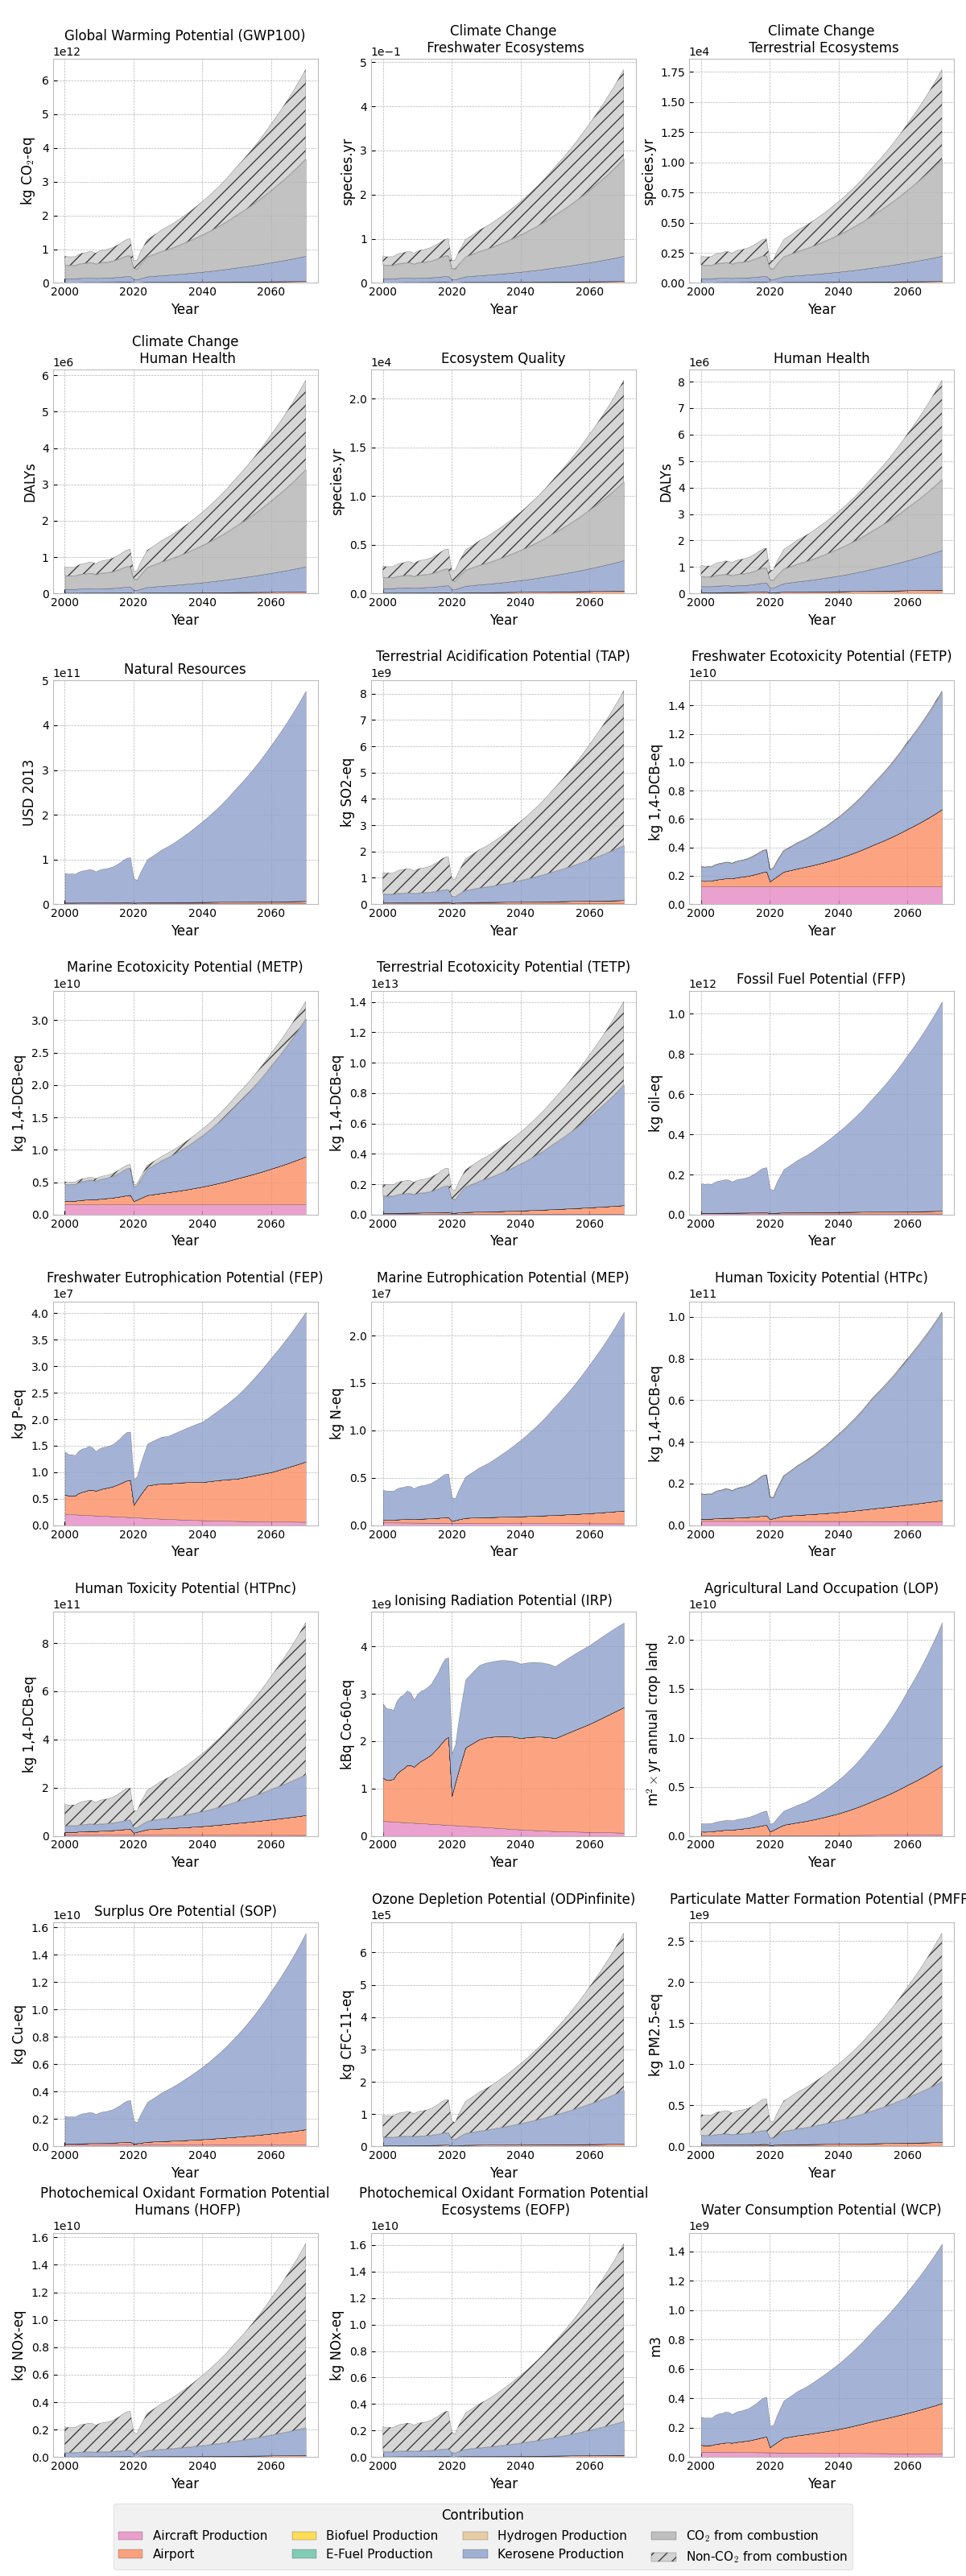

In [8]:
# Plot
plt.close()
plot_stacked_evolution_subplots(lca_outputs_scenario_1)

## Scenario 2

In [9]:
# --- Create process for scenario IS1 medium ---
process = create_process(
    configuration_file="data/config_files/config_is1medium.json",
    models=models,
)

⚠️ Warning: Using Top-Down environmental model for abatement cost. Not recommended.
⚠️ Warning: Using Top-Down environmental model for abatement cost. Not recommended.
⚠️ Warning: reference pathway for CAC (fossil_kerosene is not defined as bottom-up, using top-down values for CAC computation.


In [10]:
# --- Run assessment ---
start_time = time.time()
process.compute()
process.write_json()
print("--- %s seconds ---" % (time.time() - start_time))

/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:90: UserWarning: 
[Interpolation Model: fossil_kerosene_mean_co2_emission_factor_without_resource Warning]
The first reference year (2000) differs from the prospection start year (2020).
Interpolation will begin at the first reference year.
  warnings.warn(


⚠️ Warning: excess generic_biofuel production in years: [2021]. Scaling down.
⚠️ Warning: excess electrofuel production in years: [2047, 2050, 2051, 2053]. Scaling down.


Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/impacts/life_cycle_assessment/life_cycle_assessment.py:179: UserWarning: Value for LCA parameter "hydrogen_electrolysis_mass_consumption" is not provided. Default value 1.0 will be used.
  warnings.warn(f'Value for LCA parameter "{name}" is not provided. Default value {default_val} will be used.')
/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/impacts/life_cycle_assessment/life_cycle_assessment.py:179: UserWarning: Value for LCA parameter "hydrogen_electrolysis_emission_index_nox" is not provided. Default value 1.0 will be used.
  warnings.warn(f'Value for LCA parameter "{name}" is not provided. Default value {default_val} will be used.')
/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:121: UserWarning: 
[Interpolation Model: liquefaction_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference y

--- 7.0910608768463135 seconds ---


In [11]:
# --- Outputs ---
process_data_vector_outputs_scenario_2 = process.data['vector_outputs']
process_data_float_inputs_scenario_2 = process.data['float_inputs']
process_data_climate_scenario_2 = process.data["climate_outputs"]
lca_outputs_scenario_2 = process.data['lca_outputs']
lca_outputs_scenario_2

<xarray.DataArray 'lca' (systems: 1, impacts: 24, axis: 15, year: 71)> Size: 204kB
array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [3.38845324e+07, 3.36472950e+07, 3.34100576e+07, ...,
          2.29493189e+07, 2.28926453e+07, 2.28359716e+07],
         [3.30538240e+08, 3.22260968e+08, 3.24204148e+08, ...,
          7.86771328e+08, 8.13938532e+08, 8.40039459e+08],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.99439299e+08, 1.96071868e+08, 1.96079364e+08]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
         [2.46837961e+01, 2.45097449e+01, 2.43356938e+01, ...,
          1.59304300e+01, 1.58696333e+01, 1.58088365e+01],
         [3.26994188e+02, 3.19066468e+02, 3.21254338e+02, ...,
          7.91692887e+02, 8.18723768e+02, 8.44661623e+02],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          3.99968794e+01, 3.88279457e+01, 3.83327530e+01]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [3.70124786e+05, 3.61936185e+05, 3.65211625e+05, ...,
          1.00456796e+06, 1.03997311e+06, 1.07406384e+06],
         ...,
         [8.17641851e+03, 8.11874595e+03, 8.06107339e+03, ...,
          5.27597980e+03, 5.25583587e+03, 5.23569193e+03],
         [1.08273768e+05, 1.05648593e+05, 1.06372872e+05, ...,
          2.62122742e+05, 2.71072240e+05, 2.79659833e+05],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.32542834e+04, 1.28669545e+04, 1.27028920e+04]]]])
Coordinates:
  * systems  (systems) object 8B ('Foreground DB', 'model')
  * impacts  (impacts) object 192B ('ReCiPe 2016 v1.03, midpoint (H)', 'acidi...
  * axis     (axis) object 120B 'CO2_biofuel' ... 'e_fuel_production'
  * year     (year) float64 568B 2e+03 2.001e+03 ... 2.069e+03 2.07e+03

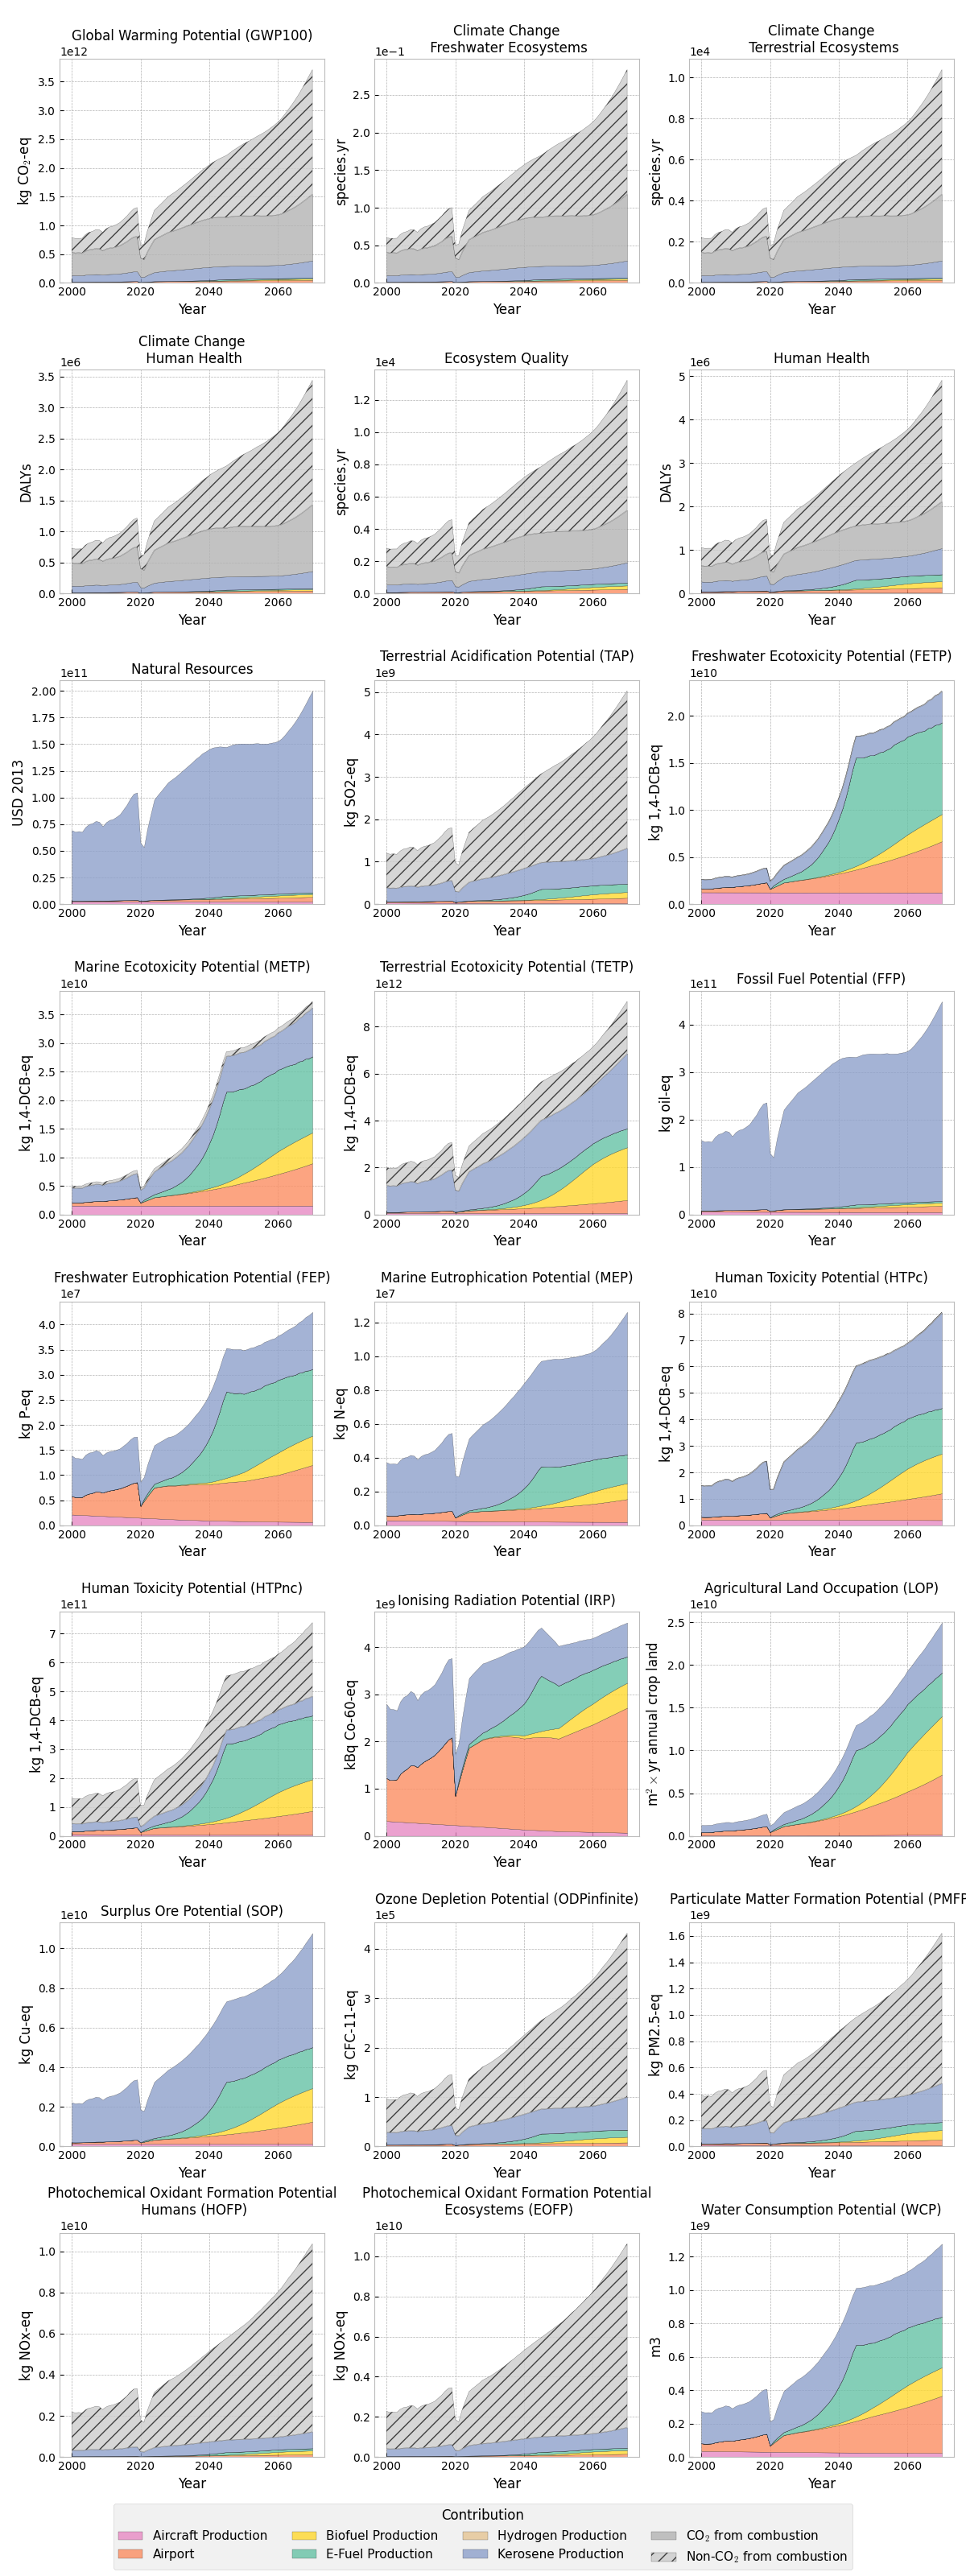

In [12]:
# --- Plot results ---
plt.close()
plot_stacked_evolution_subplots(lca_outputs_scenario_2)

## Scenario 3

In [13]:
# --- Create process for scenario IS2 medium ---
process = create_process(
    configuration_file="data/config_files/config_is2medium.json",
    models=models,
)

⚠️ Warning: Using Top-Down environmental model for abatement cost. Not recommended.
⚠️ Warning: Using Top-Down environmental model for abatement cost. Not recommended.
⚠️ Warning: reference pathway for CAC (fossil_kerosene is not defined as bottom-up, using top-down values for CAC computation.


In [14]:
# --- Run assessment ---
start_time = time.time()
process.compute()
process.write_json()
print("--- %s seconds ---" % (time.time() - start_time))

/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:90: UserWarning: 
[Interpolation Model: fossil_kerosene_mean_co2_emission_factor_without_resource Warning]
The first reference year (2000) differs from the prospection start year (2020).
Interpolation will begin at the first reference year.
  warnings.warn(


⚠️ Warning: excess generic_biofuel production in years: [2021]. Scaling down.


Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/impacts/life_cycle_assessment/life_cycle_assessment.py:179: UserWarning: Value for LCA parameter "hydrogen_electrolysis_mass_consumption" is not provided. Default value 1.0 will be used.
  warnings.warn(f'Value for LCA parameter "{name}" is not provided. Default value {default_val} will be used.')
/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/impacts/life_cycle_assessment/life_cycle_assessment.py:179: UserWarning: Value for LCA parameter "hydrogen_electrolysis_emission_index_nox" is not provided. Default value 1.0 will be used.
  warnings.warn(f'Value for LCA parameter "{name}" is not provided. Default value {default_val} will be used.')


--- 7.074758052825928 seconds ---


/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:121: UserWarning: 
[Interpolation Model: liquefaction_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:121: UserWarning: 
[Interpolation Model: electrolysis_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(


In [15]:
# --- Outputs ---
process_data_vector_outputs_scenario_3 = process.data['vector_outputs']
process_data_float_inputs_scenario_3 = process.data['float_inputs']
process_data_climate_scenario_3 = process.data["climate_outputs"]
lca_outputs_scenario_3 = process.data['lca_outputs']
lca_outputs_scenario_3

<xarray.DataArray 'lca' (systems: 1, impacts: 24, axis: 15, year: 71)> Size: 204kB
array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [3.38845324e+07, 3.36472950e+07, 3.34100576e+07, ...,
          2.29493189e+07, 2.28926453e+07, 2.28359716e+07],
         [3.30538240e+08, 3.22260968e+08, 3.24204148e+08, ...,
          2.31281631e+08, 2.31489630e+08, 2.31565602e+08],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.16768947e+09, 1.23794605e+09, 1.31040839e+09]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
         [2.46837961e+01, 2.45097449e+01, 2.43356938e+01, ...,
          1.59304300e+01, 1.58696333e+01, 1.58088365e+01],
         [3.26994188e+02, 3.19066468e+02, 3.21254338e+02, ...,
          2.32728387e+02, 2.32850583e+02, 2.32839750e+02],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          2.34176188e+02, 2.45149407e+02, 2.56179744e+02]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [3.70124786e+05, 3.61936185e+05, 3.65211625e+05, ...,
          2.95305775e+05, 2.95775393e+05, 2.96076854e+05],
         ...,
         [8.17641851e+03, 8.11874595e+03, 8.06107339e+03, ...,
          5.27597980e+03, 5.25583587e+03, 5.23569193e+03],
         [1.08273768e+05, 1.05648593e+05, 1.06372872e+05, ...,
          7.70543780e+04, 7.70947804e+04, 7.70911378e+04],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          7.76019931e+04, 8.12385561e+04, 8.48940754e+04]]]])
Coordinates:
  * systems  (systems) object 8B ('Foreground DB', 'model')
  * impacts  (impacts) object 192B ('ReCiPe 2016 v1.03, midpoint (H)', 'acidi...
  * axis     (axis) object 120B 'CO2_biofuel' ... 'e_fuel_production'
  * year     (year) float64 568B 2e+03 2.001e+03 ... 2.069e+03 2.07e+03

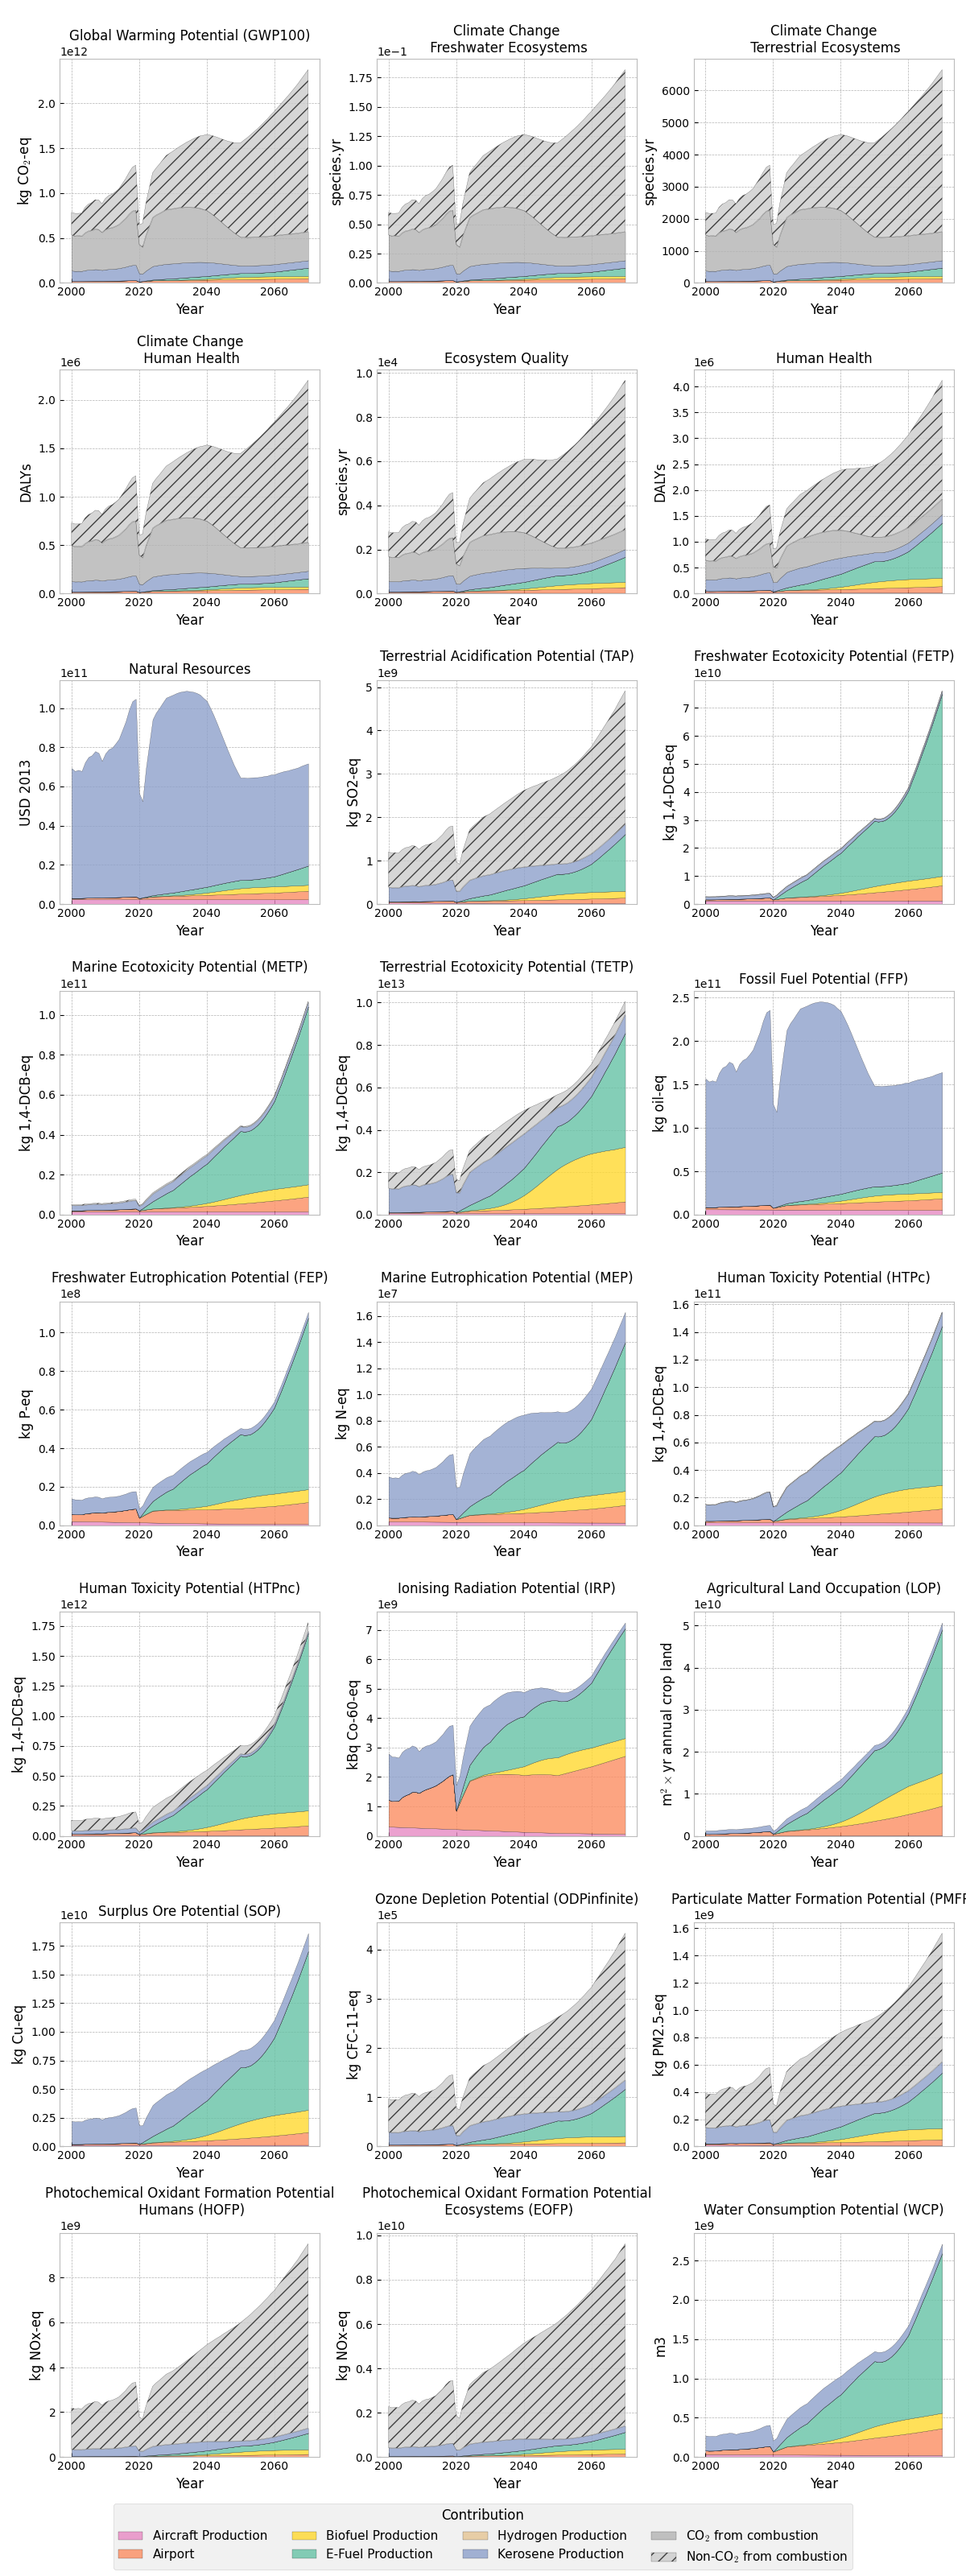

In [16]:
# --- Plot results ---
plt.close()
plot_stacked_evolution_subplots(lca_outputs_scenario_3)

## Scenario 4

In [17]:
# --- Create process for scenario IS3 medium ---
process = create_process(
    configuration_file="data/config_files/config_is3medium.json",
    models=models,
)

⚠️ Warning: Using Top-Down environmental model for abatement cost. Not recommended.
⚠️ Warning: Using Top-Down environmental model for abatement cost. Not recommended.
⚠️ Warning: reference pathway for CAC (fossil_kerosene is not defined as bottom-up, using top-down values for CAC computation.
⚠️ Warning: Using Top-Down environmental model for abatement cost. Not recommended.


In [18]:
# --- Run assessment ---
start_time = time.time()
process.compute()
process.write_json()
print("--- %s seconds ---" % (time.time() - start_time))

/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/impacts/generic_energy_model/common/energy_use_choice.py:268: UserWarning: 
The sum of the share-defined dropin_fuel fuel pathways exceeds the total dropin_fuel energy consumption (minus quantity-based pathways).
→ Pathway 'generic_biofuel' share was adjusted in the following years:
   - 2046: 55.1 % instead of 55.1 %
   - 2047: 51.8 % instead of 51.8 %

  warnings.warn(msg)
/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/impacts/generic_energy_model/common/energy_use_choice.py:268: UserWarning: 
The sum of the share-defined dropin_fuel fuel pathways exceeds the total dropin_fuel energy consumption (minus quantity-based pathways).
→ Pathway 'electrofuel' share was adjusted in the following years:
   - 2046: 44.9 % instead of 44.9 %
   - 2047: 48.2 % instead of 48.2 %

  warnings.warn(msg)
/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:90: UserWarning: 
[Interpolation Model: fossil_ker

⚠️ Warning: excess generic_biofuel production in years: [2021, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062]. Scaling down.
⚠️ Warning: excess electrofuel production in years: [2061, 2062, 2063, 2064, 2065, 2066]. Scaling down.


Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

--- 7.283135890960693 seconds ---


/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:121: UserWarning: 
[Interpolation Model: liquefaction_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
/Users/f.pollet/POSTDOC/5 - Tools/AeroMAPS/aeromaps/models/yaml_interpolator.py:121: UserWarning: 
[Interpolation Model: electrolysis_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(


In [19]:
# --- Outputs ---
process_data_vector_outputs_scenario_4 = process.data['vector_outputs']
process_data_float_inputs_scenario_4 = process.data['float_inputs']
process_data_climate_scenario_4 = process.data["climate_outputs"]
lca_outputs_scenario_4 = process.data['lca_outputs']
lca_outputs_scenario_4

<xarray.DataArray 'lca' (systems: 1, impacts: 24, axis: 15, year: 71)> Size: 204kB
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 3.38845324e+07,  3.36472950e+07,  3.34100576e+07, ...,
           2.29493189e+07,  2.28926453e+07,  2.28359716e+07],
         [ 3.30538240e+08,  3.22260968e+08,  3.24204148e+08, ...,
           0.00000000e+00,  0.00000000e+00, -5.24504646e-08],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           8.84056646e+08,  8.89270359e+08,  8.93772830e+08]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
...
         [ 2.46837961e+01,  2.45097449e+01,  2.43356938e+01, ...,
           1.59304300e+01,  1.58696333e+01,  1.58088365e+01],
         [ 3.26994188e+02,  3.19066468e+02,  3.21254338e+02, ...,
           0.00000000e+00,  0.00000000e+00, -5.27390638e-14],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           1.77294581e+02,  1.76101455e+02,  1.74729112e+02]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 3.70124786e+05,  3.61936185e+05,  3.65211625e+05, ...,
           0.00000000e+00,  0.00000000e+00, -6.70625014e-11],
         ...,
         [ 8.17641851e+03,  8.11874595e+03,  8.06107339e+03, ...,
           5.27597980e+03,  5.25583587e+03,  5.23569193e+03],
         [ 1.08273768e+05,  1.05648593e+05,  1.06372872e+05, ...,
           0.00000000e+00,  0.00000000e+00, -1.74614276e-11],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           5.87523991e+04,  5.83571797e+04,  5.79025733e+04]]]])
Coordinates:
  * systems  (systems) object 8B ('Foreground DB', 'model')
  * impacts  (impacts) object 192B ('ReCiPe 2016 v1.03, midpoint (H)', 'acidi...
  * axis     (axis) object 120B 'CO2_biofuel' ... 'e_fuel_production'
  * year     (year) float64 568B 2e+03 2.001e+03 ... 2.069e+03 2.07e+03

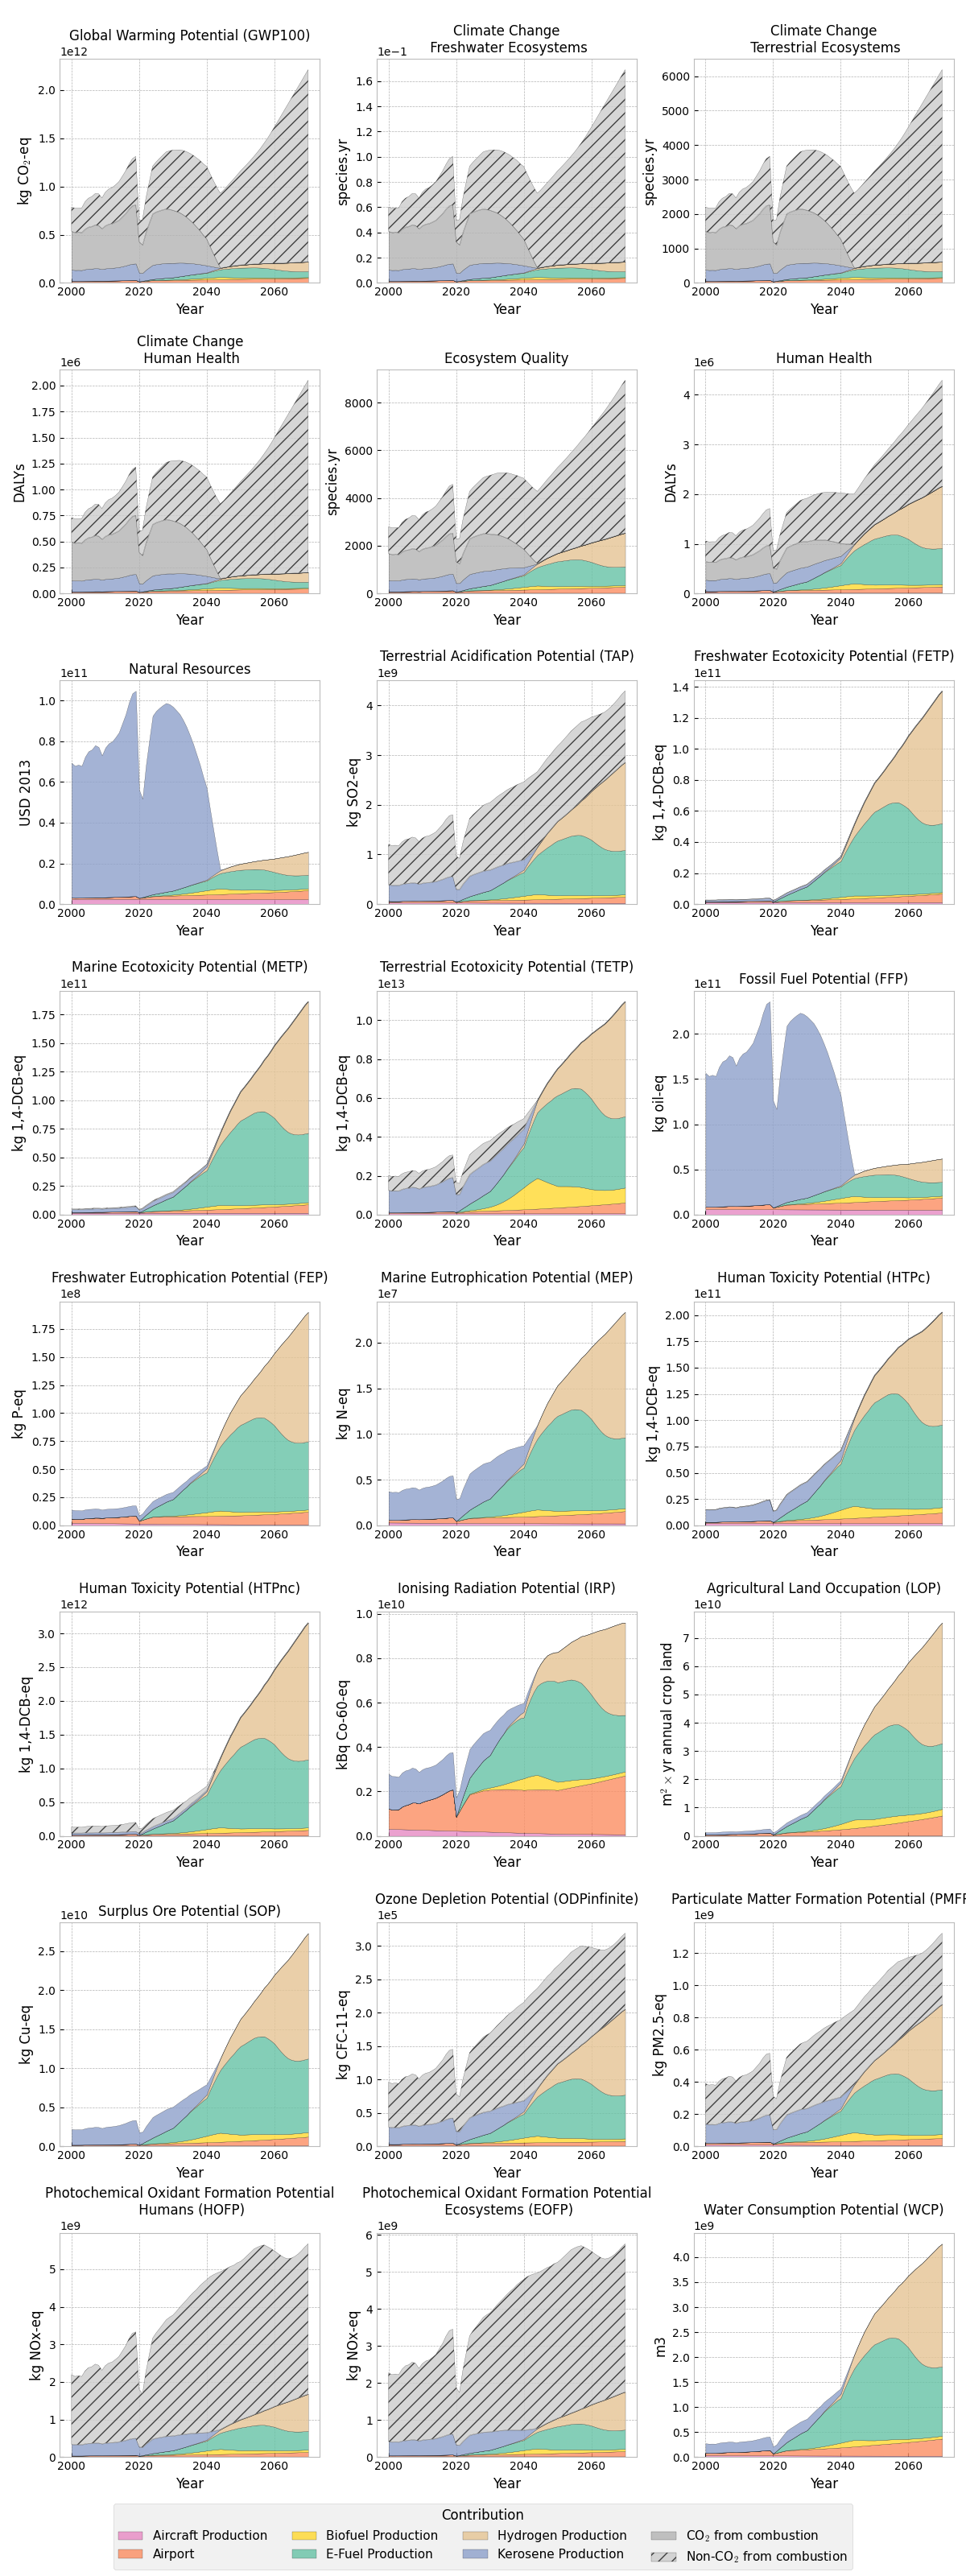

In [20]:
# --- Plot results ---
plt.close()
plot_stacked_evolution_subplots(lca_outputs_scenario_4)

# Postprocessing - From midpoints to endpoints

In [ ]:
# Get all endpoints methods
methods = [m for m in agb.findMethods('', mainCat='ReCiPe 2016 v1.03, endpoint (H)') if 'total' not in m[1]]
methods_custom = [m for m in agb.findMethods('', mainCat='Custom methods') if 'total' not in m[1]]

methods_ecosystem = [m for m in methods + methods_custom if 'ecosystem quality' in m[1]]
methods_human_health = [m for m in methods + methods_custom if 'human health' in m[1]]
methods_resources = [m for m in methods + methods_custom if 'natural resources' in m[1]]

In [ ]:
# Remove duplicate methods (i.e. ReCiPe methods which are replaced by a custom method, if both are defined in the configuration file)
methods_dict = {'ecosystem quality': methods_ecosystem, 'human health': methods_human_health, 'natural resources': methods_resources}

for name, methods_list in methods_dict.items():
    methods_to_remove = []
    for m in methods_list:
        if m[0] == 'Custom methods':
            methods_to_remove.append(('ReCiPe 2016 v1.03, endpoint (H)', name, m[2]))
    methods_dict[name] = [m for m in methods_list if m not in methods_to_remove]

In [ ]:
# Add original LCIA methods for climate change to get difference involved by non-CO2
# This is more convenient than splitting the results by 'phase' but will require post-processing by hand
methods_dict['ecosystem quality'].append(('ReCiPe 2016 v1.03, endpoint (H)', 'ecosystem quality', 'climate change: freshwater ecosystems'))
methods_dict['ecosystem quality'].append(('ReCiPe 2016 v1.03, endpoint (H)', 'ecosystem quality', 'climate change: terrestrial ecosystems'))
methods_dict['human health'].append(('ReCiPe 2016 v1.03, endpoint (H)', 'human health', 'climate change: human health'))

In [ ]:
# Create function to get the data for each scenario
def get_scenario_data(scenario, year):
    scenario_data_vector = globals()[f'process_data_vector_outputs_scenario_{scenario}']
    #scenario_data_fleet = globals()[f'process_data_fleet_model_df_scenario_{scenario}']
    scenario_data_float = globals()[f'process_data_float_inputs_scenario_{scenario}']
    scenario_data_climate = globals()[f'process_data_climate_scenario_{scenario}']

    # !! Make sure all parameters are provided. If a parameter is missing, its default value (1.0) will be applied, so the results will be wrong !!
    params_dict = dict(
        model="remind",
        pathway="SSP2_Base",
        rpk_long_range=scenario_data_vector['rpk_long_range'][year],
        rpk_medium_range=scenario_data_vector['rpk_medium_range'][year],
        rpk_short_range=scenario_data_vector['rpk_short_range'][year],
        #aircraft_production_long_range=scenario_data_fleet['Long Range: Aircraft Production'][year],
        #aircraft_production_medium_range=scenario_data_fleet['Medium Range: Aircraft Production'][year],
        #aircraft_production_short_range=scenario_data_fleet['Short Range: Aircraft Production'][year],
        fossil_kerosene_mass_consumption=scenario_data_vector['fossil_kerosene_mass_consumption'][year],
        generic_biofuel_mass_consumption=scenario_data_vector['generic_biofuel_mass_consumption'][year],
        electrofuel_mass_consumption=scenario_data_vector['electrofuel_mass_consumption'][year],
        hydrogen_electrolysis_mass_consumption=scenario_data_vector['hydrogen_electrolysis_mass_consumption'][year],
        fossil_kerosene_lhv=scenario_data_float['fossil_kerosene_lhv'],
        generic_biofuel_lhv=scenario_data_float['generic_biofuel_lhv'],
        electrofuel_lhv=scenario_data_float['electrofuel_lhv'],
        #lhv_hydrogen=scenario_data_float['lhv_hydrogen'],
        fossil_kerosene_emission_index_nox=scenario_data_float['fossil_kerosene_emission_index_nox'],
        fossil_kerosene_emission_index_sulfur=scenario_data_float['fossil_kerosene_emission_index_sulfur'],
        fossil_kerosene_emission_index_soot=scenario_data_float['fossil_kerosene_emission_index_soot'],
        generic_biofuel_emission_index_nox=scenario_data_float['generic_biofuel_emission_index_nox'],
        generic_biofuel_emission_index_sulfur=scenario_data_float['generic_biofuel_emission_index_sulfur'],
        generic_biofuel_emission_index_soot=scenario_data_float['generic_biofuel_emission_index_soot'],
        electrofuel_emission_index_nox=scenario_data_float['electrofuel_emission_index_nox'],
        electrofuel_emission_index_sulfur=scenario_data_float['electrofuel_emission_index_sulfur'],
        electrofuel_emission_index_soot=scenario_data_float['electrofuel_emission_index_soot'],
        hydrogen_electrolysis_emission_index_nox=scenario_data_float['hydrogen_electrolysis_emission_index_nox'][year],
        total_aircraft_distance=scenario_data_climate['total_aircraft_distance'][year],
        fuel_effect_correction_contrails=scenario_data_vector['fuel_effect_correction_contrails'][year],
        #load_factor_photovoltaic=1.0,
        elec_solar_share=1.0,
        year=year
    )
    
    # Check if all parameters are provided
    missing_keys = set(agb.params.all_params().keys()) - set(params_dict.keys())
    extra_keys = set(agb.params.all_params().keys()) - set(params_dict.keys())
    
    # Raise errors for missing or extra keys
    if missing_keys:
        raise KeyError(f"Parameters are missing: {missing_keys}")
    if extra_keys:
        raise KeyError(f"Two many parameters: {extra_keys}")
    
    return params_dict

In [ ]:
# Settings
year=2050  # In what year
scenario_numbers = [1, 2, 3, 4]  # Which scenarios

# Initialize dictionaries to hold dataframes for each method
dfs = {}

# This part is not computationnaly efficient and shoud be improved in the future...
for method_name, method in methods_dict.items():
    df = pd.DataFrame()
    for scenario in scenario_numbers:
        params_dict = get_scenario_data(scenario, year)

        res = agb.compute_impacts(
            process.models['life_cycle_assessment'].model,
            method,
            **params_dict,
        )

        # Rename the index for the current result
        res = res.rename(index={'model': f'scenario {scenario}'})
        
        # Concatenate the result to the DataFrame
        df = pd.concat([df, res], axis=0, ignore_index=False)
    
    # Normalize by the values of scenario 1
    #scenario_1_values = df.loc[df.index == 'scenario 1']
    #df = df.divide(scenario_1_values.values.sum())
    
    # Store the dataframe in the dictionary
    dfs[method_name] = df

In [ ]:
# Save to excel file
for method_name in methods_dict.keys():
    dfs[method_name].to_excel(f'tsas_endpoints_contributions_{method_name}.xlsx')

In [ ]:
# Modify the xlsx file at your wish for better plots, e.g. by merging low impact categories together and renaming the categories.

In [ ]:
# Reimport the data
dfs = {method_name: pd.read_excel(f'tsas_endpoints_contributions_{method_name}.xlsx', index_col=0) for method_name in methods_dict.keys()}
combined_df = pd.concat(dfs, names=['Method', 'Scenario'])#.reset_index()#(level=0)
combined_df

In [ ]:
import matplotlib.gridspec as gridspec

# Set up three subplots (one for each endpoint)
clusters = combined_df.index.levels[0]  
inter_graph = 0
maxi = np.max(np.sum(combined_df, axis=1))
total_width = len(combined_df)+inter_graph*(len(clusters)-1)
fig = plt.figure(figsize=(total_width,6))

# Plot properties
gridspec.GridSpec(1, total_width)
axes=[]
palette = sns.color_palette("tab10")
#palette.insert(1, palette[1])  # Duplicate color for second position (climate change CO2) for third position (climate change Non-CO2)
#hatches = [''] * len(combined_df.index)
#hatches[2] = '//'

ax_position = 0
for cluster in clusters:
    subset = combined_df.loc[cluster]
    ax = subset.plot(kind="bar", stacked=True, width=0.8, ax=plt.subplot2grid((1,total_width), (0,ax_position), colspan=len(subset.index)), color=palette, alpha=0.8, edgecolor='0.2')
    axes.append(ax)
    ax.set_title(cluster.title(), fontsize=15)
    ax.set_xlabel("")
    #ax.set_ylim(0,maxi*1.1)
    ax_position += len(subset.index)+inter_graph
    ax.tick_params(axis='x', rotation=0, labelsize=11)
    
    tick_labels = [label.get_text() for label in ax.get_xticklabels()]
    wrapped_labels = [
        '\n('.join([label.split('(')[0], label.split('(')[1]]) if '(' in label else label
        for label in tick_labels
    ]
    ax.set_xticklabels(wrapped_labels)
    ax.set_axisbelow(True)
    
    # Apply hatches to the specific segment of the stacks
    #for bar_group, hatch_pattern in zip(ax.containers, hatches[:len(subset.columns)]):
    #    for bar in bar_group:
    #        bar.set_hatch(hatch_pattern)

for i in range(0,len(clusters)):
    axes[i].legend().set_visible(False)
for i in range(1,len(clusters)-1):
    axes[i].set_yticklabels("")
axes[-1].yaxis.tick_right()
axes[-1].tick_params(axis='y', labelsize=13)
axes[0].tick_params(axis='y', labelsize=13)
axes[0].set_ylabel("Impacts relative to IS0", fontsize=15)

# Collect legend labels from all plots.
entries = collections.OrderedDict()
for ax in axes:
    for handle, label in zip(*axes[0].get_legend_handles_labels()):
        label_name = label.replace('_', ' ').title()
        entries[label_name] = handle
legend = fig.legend(
    entries.values(), entries.keys(),
    loc='lower center', bbox_to_anchor=(0.5, 0),
    ncol=2,
    fontsize=13,
    title='Midpoint Category',
    title_fontsize=14
)

# Set tight layout while keeping legend in the screen
bbox = legend.get_window_extent(fig.canvas.get_renderer()).transformed(fig.transFigure.inverted())
fig.tight_layout(rect=(0, bbox.y1, 1, 1), h_pad=0.5, w_pad=0.5)

plt.show()